In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mmengine.structures.instance_data import InstanceData
import torch
from sklearn.manifold import TSNE
import pickle

In [4]:
def show_TSNE(output: dict):
    tsne = TSNE(random_state=0, perplexity =50)
    tsne_output= tsne.fit_transform(output['embedding'].cpu().detach().numpy())
    labels = output['labels'].cpu().detach().numpy()

    plt.figure(figsize=(16, 16))
    # plt.scatter(tsne_output[:, 0], tsne_output[:, 1], marker='o',c=labels, cmap='jet', alpha=0.5)

    selected_tsne_output = tsne_output[labels == 0]
    plt.scatter(selected_tsne_output[:, 0], selected_tsne_output[:, 1], marker='o', c='red', alpha=0.5)

    other_tsne_output = tsne_output[labels != 0]
    plt.scatter(other_tsne_output[:, 0], other_tsne_output[:, 1], marker='o', c='green', alpha=0.5)
    plt.show()


In [31]:
coco_cls=['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# 指定要加载的 .pkl 文件路径
# file_path = "../../data_proto.pkl"
file_path = "../../data.pkl"

# 加载 .pkl 文件
with open(file_path, "rb") as f:
    loaded_data = pickle.load(f)

tsne = TSNE(random_state=0, perplexity =50)
tsne_output= tsne.fit_transform(loaded_data['cate_protos'].T.cpu().detach().numpy())

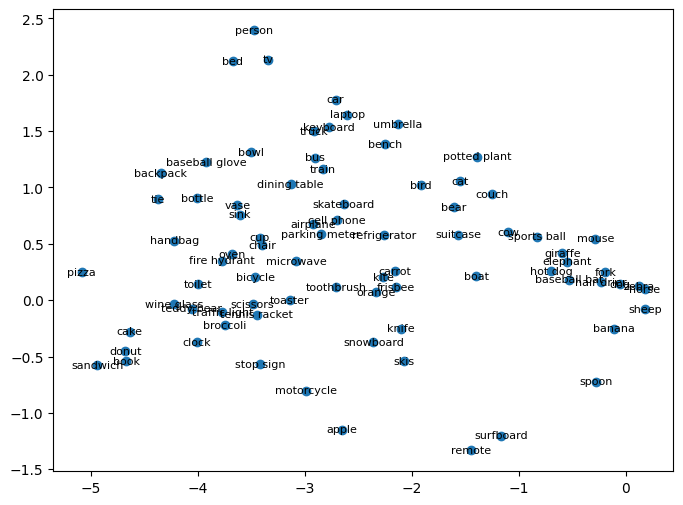

In [32]:
x = tsne_output[:, 0]
y = tsne_output[:, 1]

# 假设 textcoords 是一个包含 80 个标签的列表
textcoords = coco_cls

# 创建新的图形
plt.figure(figsize=(8, 6))

# 绘制散点图
plt.scatter(x, y)

# 一次性添加所有文本标签
for (xi, yi, txt) in zip(x, y, textcoords):
    plt.text(xi, yi, txt, ha='center', va='center', fontsize=8)

In [15]:
loaded_data['cate_protos'].T.shape

torch.Size([80, 2048])